<b>
<p>
<center>
<font size="5">
Mobile Price Classification
</font>
</center>
</p>

<p>
<center>
<font size="4">
Final Project - Machine Learning
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Team 11
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>
<hr>


# Overview

- This notebook includes project work of team 11.
- Here we will work on kaggle competation kaggle competation [Mobile Price Classification for Course](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification).
- **The baseline for this [competition](https://www.kaggle.com/competitions/copy-mobile-price-classification-sber/leaderboard) is 0.84857.**
- The goal of this project is tweaking the pipeline (including data preprocessing, hyperparameter tuning and model selection) implemented in [/p2 c2 s2 training shallow models/case_study](https://github.com/yuxiaohuang/teaching/blob/main/machine_learning_I/spring_2024/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s2_training_shallow_models/case_study/case_study.ipynb) to make it work you need to download the files "pmlm_models_shallow", "pmlm_utilities_deep", and "pmlm_utilities_shallow" from the teaching [link](https://github.com/yuxiaohuang/teaching/tree/main/machine_learning_I/spring_2024/code), anf the test and train data can be collected from the competition data page.

Description of dataset

<table>
  <tr>
    <th>Column Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>battery_power</td>
    <td>The total energy a battery can store in milliampere-hours (mAh).</td>
  </tr>
  <tr>
    <td>blue</td>
    <td>Indicates the presence of Bluetooth (1 if present, 0 if absent).</td>
  </tr>
  <tr>
    <td>clock_speed</td>
    <td>The speed at which the microprocessor executes instructions, measured in gigahertz (GHz).</td>
  </tr>
  <tr>
    <td>dual_sim</td>
    <td>Indicates whether the device supports dual SIM cards (1 if supported, 0 if not supported).</td>
  </tr>
  <tr>
    <td>fc</td>
    <td>Front Camera mega pixels.</td>
  </tr>
  <tr>
    <td>four_g</td>
    <td>Indicates the presence of 4G connectivity (1 if present, 0 if absent).</td>
  </tr>
  <tr>
    <td>int_memory</td>
    <td>Internal Memory capacity in gigabytes (GB).</td>
  </tr>
  <tr>
    <td>m_dep</td>
    <td>Mobile Depth in cm.</td>
  </tr>
  <tr>
    <td>mobile_wt</td>
    <td>Weight of mobile phone in grams.</td>
  </tr>
  <tr>
    <td>n_cores</td>
    <td>Number of cores of the processor.</td>
  </tr>
  <tr>
    <td>pc</td>
    <td>Primary Camera mega pixels.</td>
  </tr>
  <tr>
    <td>px_height</td>
    <td>Pixel Resolution Height.</td>
  </tr>
  <tr>
    <td>px_width</td>
    <td>Pixel Resolution Width.</td>
  </tr>
  <tr>
    <td>ram</td>
    <td>Random Access Memory capacity in megabytes (MB).</td>
  </tr>
  <tr>
    <td>sc_h</td>
    <td>Screen Height of mobile in cm.</td>
  </tr>
  <tr>
    <td>sc_w</td>
    <td>Screen Width of mobile in cm.</td>
  </tr>
  <tr>
    <td>talk_time</td>
    <td>The longest time that a single battery charge will last when you are on a call.</td>
  </tr>
  <tr>
    <td>three_g</td>
    <td>Indicates the presence of 3G connectivity (1 if present, 0 if absent).</td>
  </tr>
  <tr>
    <td>touch_screen</td>
    <td>Indicates whether the device has a touch screen (1 if present, 0 if absent).</td>
  </tr>
  <tr>
    <td>wifi</td>
    <td>Indicates whether the device supports Wi-Fi (1 if supported, 0 if not supported).</td>
  </tr>
  <tr>
    <td>price_range</td>
    <td>This is the target variable with values indicating the price range of the mobile phone with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).
</td>
  </tr>
</table>


# Problem Statement

Bob has started his own mobile company and wants to compete with big players like Apple and Samsung. However, he's unsure how to price his mobile phones competitively. To tackle this, he gathers sales data from various companies to understand the relationship between different features (e.g., RAM, internal memory) and selling prices. Bob needs assistance in analyzing this data and building a model to predict price ranges for his mobile phones based on their specifications. By doing so, Bob aims to make informed pricing decisions and establish his company in the competitive mobile phone market.

## Machine Learning Goals

### Predicting Phone Price Range Based on Specifications

Our aim is to predict the price range of mobile phones based on their specifications. We'll explore different classification models to find the one that best predicts phone prices accurately. By comparing models using metrics like accuracy, we'll identify the most effective one for this task.

# Notebook Configuration

## Google drive

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/MyDrive/ML Final Project/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/MyDrive/ML Final Project/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/MyDrive/ML Final Project/'

Mounted at /content/drive


## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [6]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/MyDrive/ML Final Project


Loading the data - Mobile Price Classification

In [7]:
# Implement me
import pandas as pd

# Load the raw training data
df_raw_train = pd.read_csv(abspath_curr + 'train.csv',
                           header=0)
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = pd.read_csv(abspath_curr + 'test.csv',
                          header=0)
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'price_range'

In [8]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,2000,21


In [9]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1000,21


In [10]:

# Print the first 5 rows of df_train
df_train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:

# Print the first 5 rows of df_test
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


Splitting the data

The code below shows how to divide the training data into training (80%) and validation (20%).

In [12]:

from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [13]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])


,# rows,# columns
0,1600,21


In [14]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])


,# rows,# columns
0,400,21


Handling uncommon features

Identifying uncommon features

The code below shows how to find common variables between the training, validation and test data.

In [15]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [16]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [17]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])


,uncommon feature


In [18]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])


,uncommon feature
0,id


In [19]:

# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1923,0,0.5,1,7,0,46,0.5,191,1,...,767,1759,1489,10,9,3,1,1,1,1
1,633,1,2.2,0,0,1,49,0.1,139,8,...,529,1009,3560,11,1,16,1,1,1,2
2,1236,0,0.9,1,2,1,57,0.1,188,1,...,517,809,1406,14,12,20,1,0,1,0
3,781,0,1.1,0,2,0,38,0.4,198,5,...,304,1674,3508,13,8,5,0,0,1,3
4,1456,1,0.5,1,7,0,7,0.4,105,5,...,823,1104,1587,6,5,20,1,0,1,1


In [20]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1646,0,2.5,0,3,1,25,0.6,200,2,...,211,1608,686,8,6,11,1,1,0,0
1,1182,0,0.5,0,7,1,8,0.5,138,8,...,275,986,2563,19,17,19,1,0,0,2
2,1972,0,2.9,0,9,0,14,0.4,196,7,...,293,952,1316,8,1,8,1,1,0,1
3,989,1,2.0,0,4,0,17,0.2,166,3,...,256,1394,3892,18,7,19,1,1,0,3
4,615,1,0.5,1,7,0,58,0.5,130,5,...,1021,1958,1906,14,5,5,1,0,0,1


In [21]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


Handling Identifiers

Combining the training, validation and test data

The code below shows how to combine the training, validation and test data.

In [22]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)
# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,int64
1,float64


Identifying identifiers

The code below shows how to find identifiers from data.

In [23]:

# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

""
0
1
2
3
4


Removing identifiers

The code below shows how to remove identifiers from data.

In [24]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

Handling date and time variables

there are no date/time variables in the dataset



handling missing data

In [25]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [26]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

In [27]:
#The nunique () method returns the number of unique values for each column
df.nunique()

battery_power    1275
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1333
px_width         1313
ram              2070
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [28]:
#checking whether there is null values or not
df.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
dtype: int64

##Exploratory Data Analysis

Checking Outliers

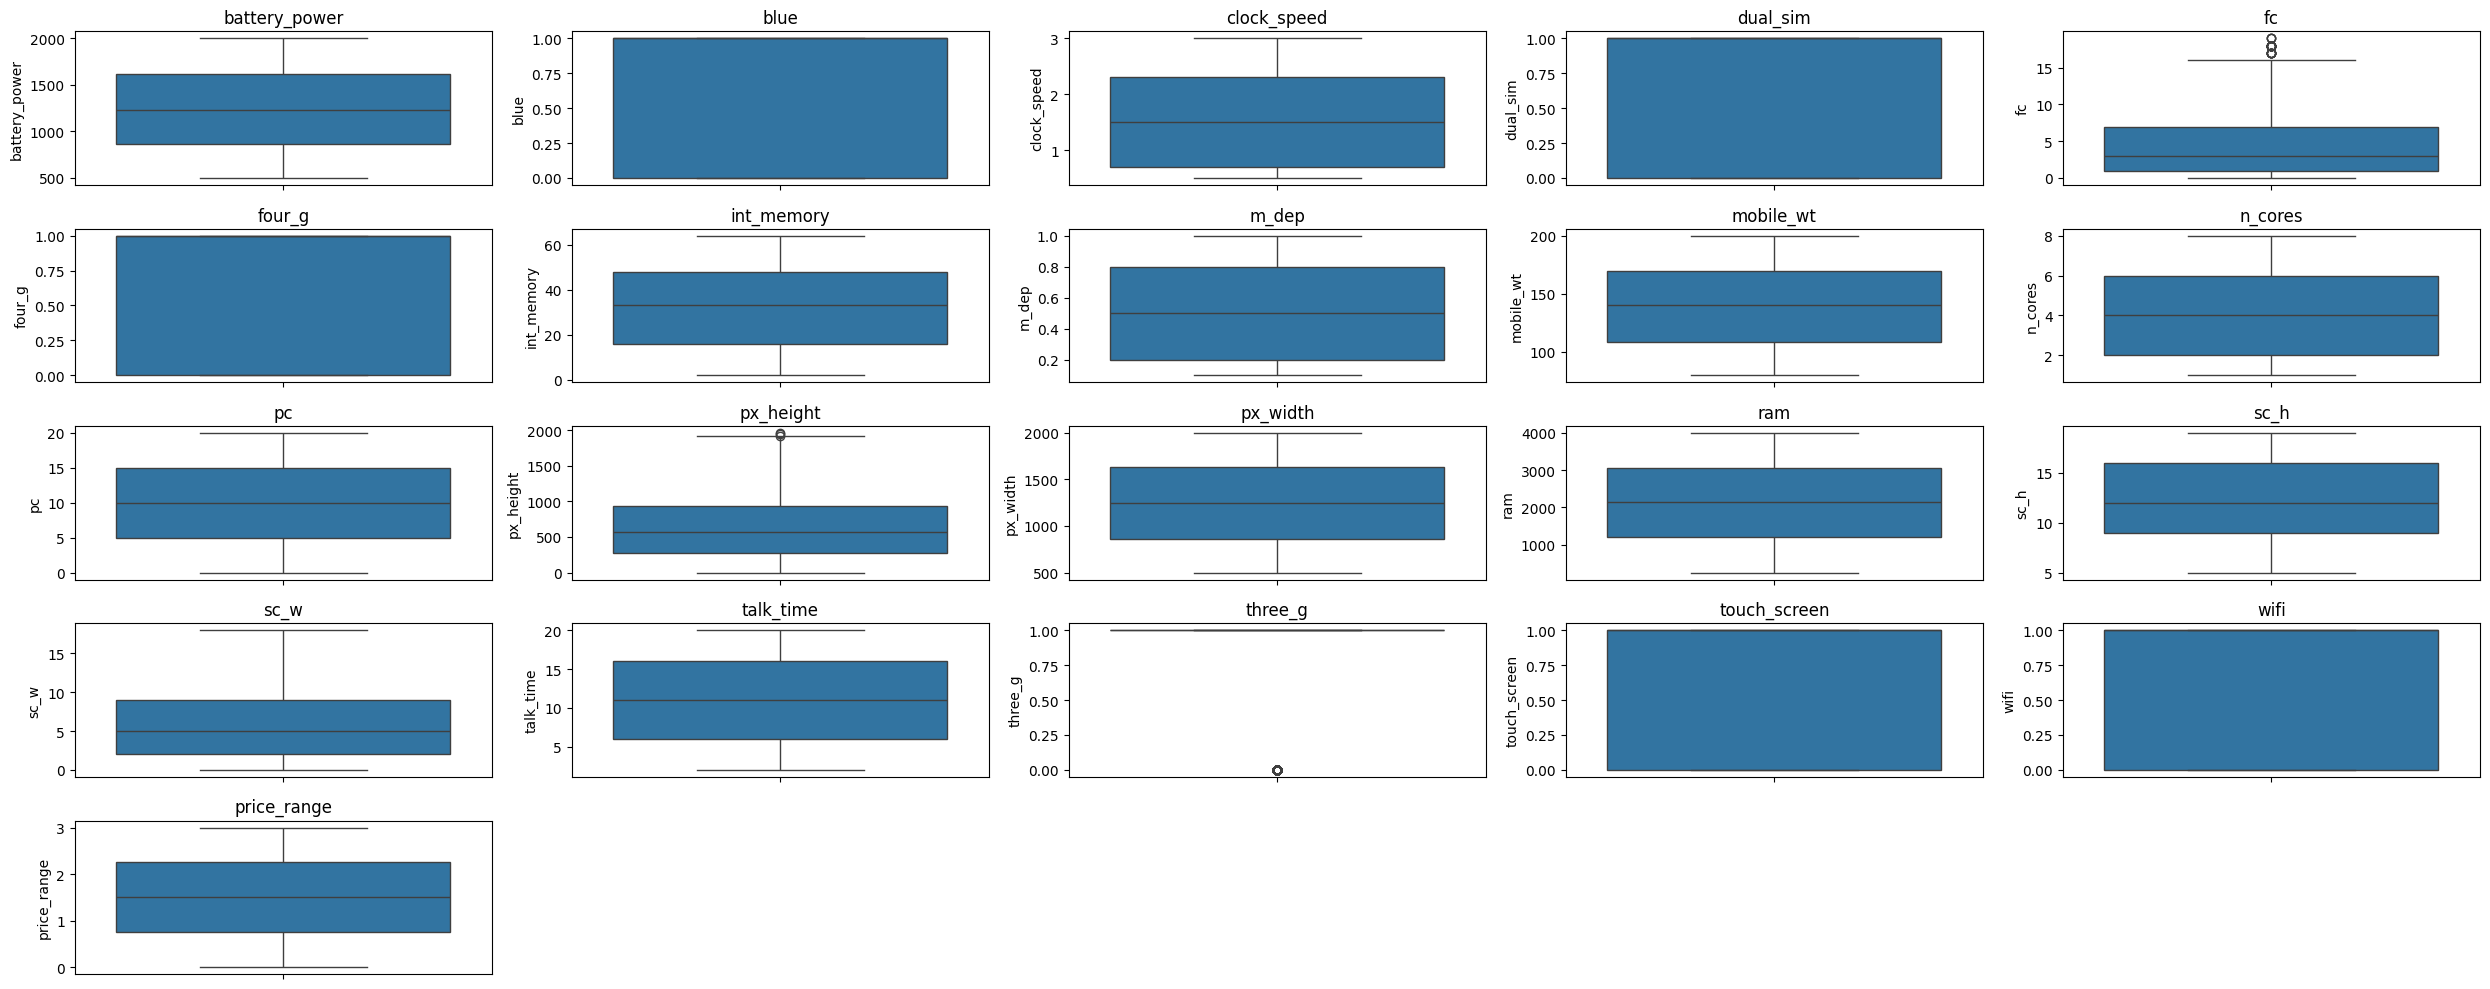

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,10))
for index, item in enumerate([i for i in df.describe().columns.to_list()]):
    plt.subplot(5, 5, index + 1)
    sns.boxplot(df[item])
    plt.title(item)  # Adding title to each subplot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


We've identified outliers in the 'fc','px_height' and 'three_g' columns. While they exist, they represent only a small proportion of the values.

Heat map showing the correlation for differnet variables

<Axes: >

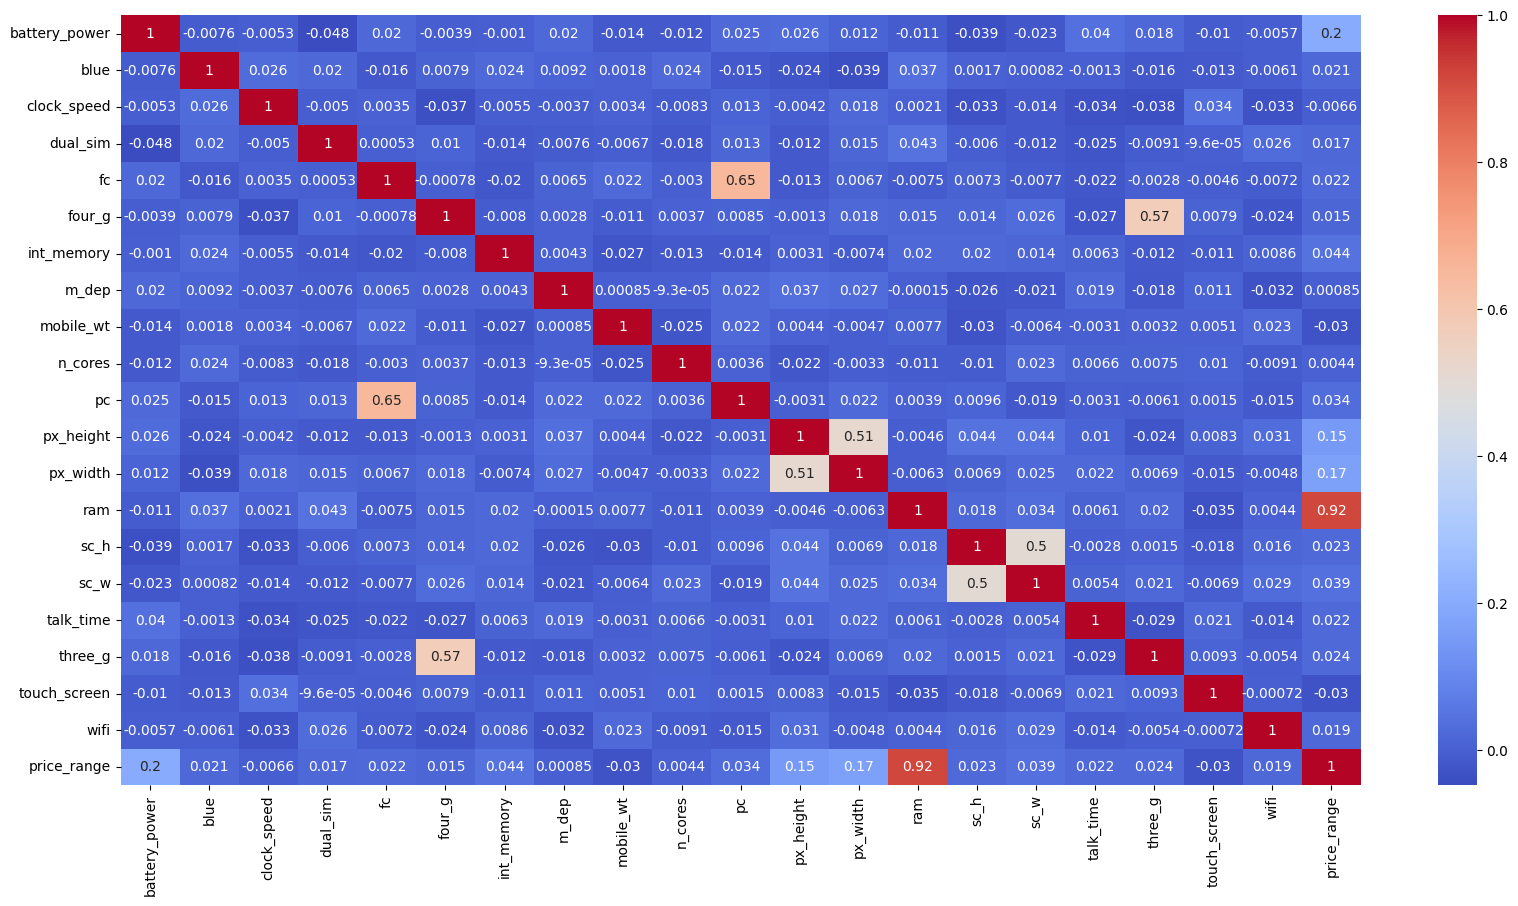

In [30]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [31]:
correlation = df.corr()
correlation['price_range'].sort_values(ascending = False)[1:]

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

This shows that a ram's size is highly correlated with its price range.


###Separating the training, validation and test data

The code below shows how to separate the training, validation and test data.

In [32]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [33]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1600,21


In [34]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,400,21


In [35]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1000,21


In [36]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,int64
1,float64


In [37]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique


In [38]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(np.intersect1d(df.columns, df_cat['var']), [target]))

# Print the first 5 rows of df
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1923,0,0.5,1,7,0,46,0.5,191,1,...,767,1759,1489,10,9,3,1,1,1,1.0
1,633,1,2.2,0,0,1,49,0.1,139,8,...,529,1009,3560,11,1,16,1,1,1,2.0
2,1236,0,0.9,1,2,1,57,0.1,188,1,...,517,809,1406,14,12,20,1,0,1,0.0
3,781,0,1.1,0,2,0,38,0.4,198,5,...,304,1674,3508,13,8,5,0,0,1,3.0
4,1456,1,0.5,1,7,0,7,0.4,105,5,...,823,1104,1587,6,5,20,1,0,1,1.0


Imputing missing values

The code below shows how to use the mode of a variable to impute its missing values.

In [39]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1923,0,0.5,1,7,0,46,0.5,191,1,...,767,1759,1489,10,9,3,1,1,1,1
1,633,1,2.2,0,0,1,49,0.1,139,8,...,529,1009,3560,11,1,16,1,1,1,2
2,1236,0,0.9,1,2,1,57,0.1,188,1,...,517,809,1406,14,12,20,1,0,1,0
3,781,0,1.1,0,2,0,38,0.4,198,5,...,304,1674,3508,13,8,5,0,0,1,3
4,1456,1,0.5,1,7,0,7,0.4,105,5,...,823,1104,1587,6,5,20,1,0,1,1


Separating the training, validation and test data

The code below shows how to separate the training, validation and test data.

In [40]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [41]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])


,# rows,# columns
0,1600,21


In [42]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,400,21


In [43]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1000,21


Splitting the feature and target

The code below shows how to split the feature and target.

In [44]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

Scaling the data

Standardization:
The code below shows how to standardize the data.

In [45]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

Standardizing the features

The code below shows how to standardize the features.

In [46]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

Hyperparameter Tuning

Creating the dictionary of the models
In the dictionary:
the key is the acronym of the model
the value is the model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed)
          }

Creating the dictionary of the pipelines
In the dictionary:

the key is the acronym of the model
the value is the pipeline, which, for now, only includes the model

In [48]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

Getting the predefined split cross-validator

In [49]:
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

GridSearchCV

Creating the dictionary of the parameter grids
In the dictionary:
the key is the acronym of the model
the value is the parameter grid of the model

In [50]:
param_grids = {}


The parameter grid for LogisticRegression

The hyperparameters we want to fine-tune are:
tol
C
See details of the meaning of the hyperparametes in sklearn.linear_model.LogisticRegression

In [51]:
# Define parameter grid for LR
param_grid_lr = {
    'model__tol': [10 ** -5, 10 ** -4, 10 ** -3],
    'model__C': [0.1, 1, 10]
}

# Perform GridSearchCV for LR
gs_lr = GridSearchCV(estimator=pipes['lr'],
                     param_grid=param_grid_lr,
                     scoring='f1_macro',
                     n_jobs=2,
                     cv=ps,
                     return_train_score=True)

# Fit GridSearchCV for LR
gs_lr.fit(X_train_val, y_train_val)

# Get best score, parameters, and estimator for LR
best_score_lr, best_params_lr, best_estimator_lr = gs_lr.best_score_, gs_lr.best_params_, gs_lr.best_estimator_


The parameter grid for MLPClassifier

The hyperparameters we want to fine-tune are:

alpha
learning_rate_init
See details of the meaning of the hyperparametes in sklearn.neural_network.MLPClassifier

In [52]:
# Define parameter grid for MLPClassifier
param_grid_mlpc = {
    'model__alpha': [10 ** i for i in range(-5, -2)],
    'model__learning_rate_init': [10 ** i for i in range(-4, -1)]
}

# Perform GridSearchCV for MLPClassifier
gs_mlpc = GridSearchCV(estimator=pipes['mlpc'],
                       param_grid=param_grid_mlpc,
                       scoring='f1_macro',
                       n_jobs=2,
                       cv=ps,
                       return_train_score=True)

# Fit GridSearchCV for MLPClassifier
gs_mlpc.fit(X_train_val, y_train_val)

# Get best score, parameters, and estimator for MLPClassifier
best_score_mlpc, best_params_mlpc, best_estimator_mlpc = gs_mlpc.best_score_, gs_mlpc.best_params_, gs_mlpc.best_estimator_


The parameter grid for random forest

The hyperparameters we want to fine-tune are:

min_samples_split
min_samples_leaf
See details of the meaning of the hyperparametes in sklearn.ensemble.RandomForestClassifier

In [53]:
# Define parameter grid for RandomForestClassifier
param_grid_rfc = {
    'model__min_samples_split': [2, 20, 100],
    'model__min_samples_leaf': [1, 20, 100]
}

# Perform GridSearchCV for RandomForestClassifier
gs_rfc = GridSearchCV(estimator=pipes['rfc'],
                      param_grid=param_grid_rfc,
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

# Fit GridSearchCV for RandomForestClassifier
gs_rfc.fit(X_train_val, y_train_val)

# Get best score, parameters, and estimator for RandomForestClassifier
best_score_rfc, best_params_rfc, best_estimator_rfc = gs_rfc.best_score_, gs_rfc.best_params_, gs_rfc.best_estimator_


The parameter grid for histogram-based gradient boosting

The hyperparameters we want to fine-tune are:

learning_rate

min_samples_leaf

See details of the meaning of the hyperparametes in sklearn.ensemble.HistGradientBoostingClassifier

In [54]:
# Define parameter grid for HistGradientBoostingClassifier
param_grid_hgbc = {
    'model__learning_rate': [10 ** i for i in range(-3, 2)],
    'model__min_samples_leaf': [1, 20, 100]
}

# Perform GridSearchCV for HistGradientBoostingClassifier
gs_hgbc = GridSearchCV(estimator=pipes['hgbc'],
                       param_grid=param_grid_hgbc,
                       scoring='f1_macro',
                       n_jobs=2,
                       cv=ps,
                       return_train_score=True)

# Fit GridSearchCV for HistGradientBoostingClassifier
gs_hgbc.fit(X_train_val, y_train_val)

# Get best score, parameters, and estimator for HistGradientBoostingClassifier
best_score_hgbc, best_params_hgbc, best_estimator_hgbc = gs_hgbc.best_score_, gs_hgbc.best_params_, gs_hgbc.best_estimator_


Tuning the hyperparameters

The code below shows the results of hyperparameters that we had been tuned.

In [55]:
# Create a list to store the results
results = []

# Add LR results
results.append({'Model': 'LR',
                'Best Score': best_score_lr,
                'Best Params': best_params_lr,
                'Best Estimator': best_estimator_lr})

# Add MLPClassifier results
results.append({'Model': 'MLPClassifier',
                'Best Score': best_score_mlpc,
                'Best Params': best_params_mlpc,
                'Best Estimator': best_estimator_mlpc})

# Add RandomForestClassifier results
results.append({'Model': 'RandomForestClassifier',
                'Best Score': best_score_rfc,
                'Best Params': best_params_rfc,
                'Best Estimator': best_estimator_rfc})

# Add HistGradientBoostingClassifier results
results.append({'Model': 'HistGradientBoostingClassifier',
                'Best Score': best_score_hgbc,
                'Best Params': best_params_hgbc,
                'Best Estimator': best_estimator_hgbc})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)


                            Model  Best Score  \
0                              LR    0.979462   
1                   MLPClassifier    0.901794   
2          RandomForestClassifier    0.886373   
3  HistGradientBoostingClassifier    0.915545   

                                         Best Params  \
0               {'model__C': 1, 'model__tol': 1e-05}   
1  {'model__alpha': 1e-05, 'model__learning_rate_...   
2  {'model__min_samples_leaf': 1, 'model__min_sam...   
3  {'model__learning_rate': 0.1, 'model__min_samp...   

                                      Best Estimator  
0  (LogisticRegression(C=1, class_weight='balance...  
1  (MLPClassifier(alpha=1e-05, early_stopping=Tru...  
2  ((DecisionTreeClassifier(max_features='sqrt', ...  
3  (HistGradientBoostingClassifier(min_samples_le...  


Bar chart showing the scores of different models that we have been tuned

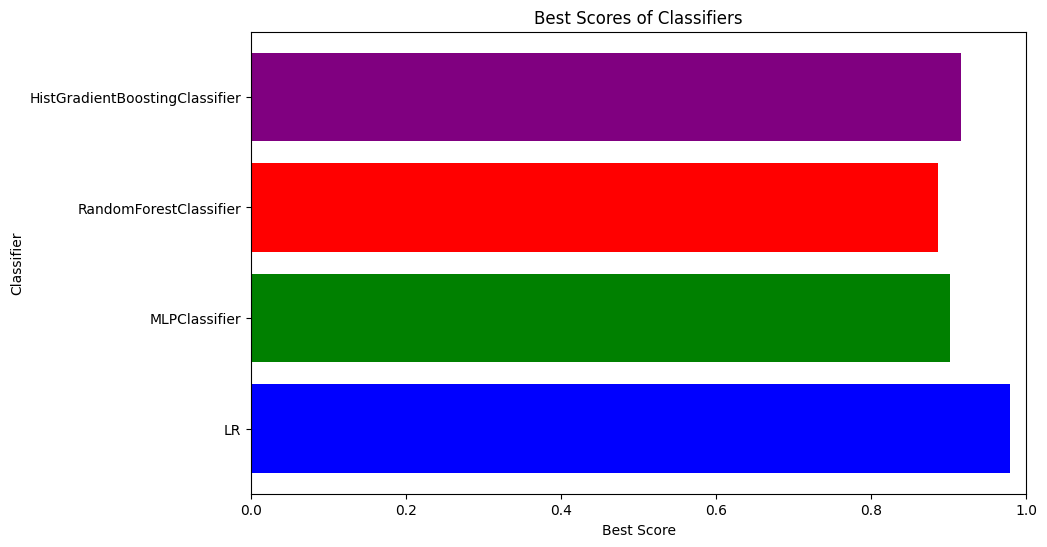

In [56]:
import matplotlib.pyplot as plt

# Extract the best scores
best_scores = [best_score_lr, best_score_mlpc, best_score_rfc, best_score_hgbc]

# Define the classifiers
classifiers = ['LR', 'MLPClassifier', 'RandomForestClassifier', 'HistGradientBoostingClassifier']

# Plot the graph
plt.figure(figsize=(10, 6))
plt.barh(classifiers, best_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Best Score')
plt.ylabel('Classifier')
plt.title('Best Scores of Classifiers')
plt.xlim([0, 1])  # Set the x-axis limits
plt.show()


# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

In [57]:
# Predictions for LR
y_pred_lr = best_estimator_lr.predict(X_test)

# Predictions for MLPClassifier
y_pred_mlpc = best_estimator_mlpc.predict(X_test)

# Predictions for RandomForestClassifier
y_pred_rfc = best_estimator_rfc.predict(X_test)

# Predictions for HistGradientBoostingClassifier
y_pred_hgbc = best_estimator_hgbc.predict(X_test)

# Create a DataFrame with predictions
submission_df = pd.DataFrame({
    'LR': y_pred_lr,
    'MLPClassifier': y_pred_mlpc,
    'RandomForestClassifier': y_pred_rfc,
    'HistGradientBoostingClassifier': y_pred_hgbc
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


## Getting the feature importance detected by Logistic Regression

In [58]:
from sklearn.inspection import permutation_importance

# Fit permutation importance
perm_importance_lr = permutation_importance(best_estimator_lr, X_train, y_train, n_repeats=30, random_state=42)

# Get feature importances
feature_importances_lr = perm_importance_lr.importances_mean

# Create a DataFrame to store feature importances
df_fi_lr = pd.DataFrame({'Features': np.setdiff1d(df_train.columns, [target]), 'Importance': feature_importances_lr})

# Sort DataFrame by importance
df_fi_lr = df_fi_lr.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print the first 5 rows of feature importance
print(df_fi_lr.head())


        Features  Importance
0            ram    0.701750
1  battery_power    0.226271
2       px_width    0.113292
3      px_height    0.111271
4      mobile_wt    0.020833


## Plotting the Feature Importance

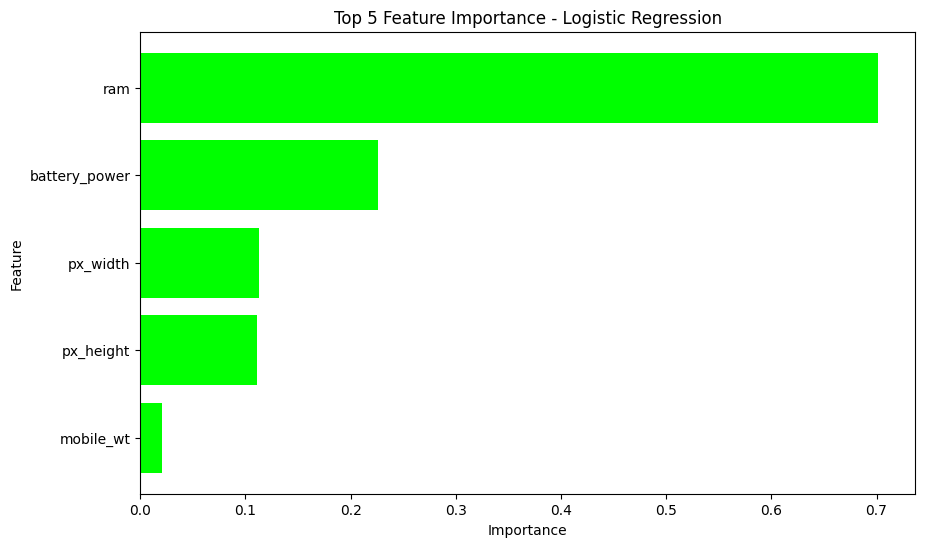

In [59]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the feature importance
plt.barh(df_fi_lr['Features'][:5], df_fi_lr['Importance'][:5], color='lime')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


### Multivariate Visualization


Since our previous analysis revealed that the top five variables listed above have the highest correlation with price range, we will visualize all variables with price range.

In [60]:
df.groupby('price_range')[['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt']].mean()

,ram,battery_power,px_height,px_width,mobile_wt
price_range,,,,,
0,785.314,1116.902,536.408,1150.270,140.552
1,1679.490,1228.868,666.892,1251.908,140.510
2,2582.816,1228.320,632.284,1234.046,143.614
3,3449.232,1379.984,744.848,1369.838,136.320
4,2138.998,1248.510,627.121,1239.774,139.511


## Conclusion

After evaluating various machine learning classification models for predicting phone price ranges based on specifications, we found that logistic regression emerged as the best fit for this task. With an accuracy of 0.979462, logistic regression outperformed other models in accurately classifying phone prices. Therefore, we recommend utilizing logistic regression for predicting phone price ranges in future applications.

Additionally, our analysis revealed several insights regarding the correlation between phone specifications and price range. RAM demonstrated the highest correlation among all columns, indicating that higher-priced phones tend to have more RAM. There is also a trend where higher RAM correlates with higher battery capacity. Furthermore, pixel width and height show a correlation with price range, with higher-priced phones generally having larger screen sizes. Interestingly, in price range 4, there is a noticeable decrease in most specifications compared to price range 3, except for mobile weight, suggesting a preference for lighter weight and minimal specifications in this price range. These insights provide valuable information for understanding consumer preferences and market trends in the mobile phone industry.

## References

[**yuxiaohuang**/teaching/p2 c2 s5 tree_based_models/case_study](https://github.com/yuxiaohuang/teaching/blob/main/machine_learning_I/spring_2024/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s5_tree_based_models/case_study/case_study.ipynb)

[Kaggle-Mobile Price Classification
](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

[Project layout](https://github.com/yuxiaohuang/teaching/blob/main/machine_learning_I/spring_2024/slides/p2_shallow_learning/p2_c1_data_preprocessing/data_preprocessing.pdf) - Referred to table 3 on page 20 of the lecture slides.

# Folder and [link](https://drive.google.com/drive/folders/1w-J9FBZrKDqIb2WPZvrGpNExr7hBCQes?usp=drive_link) to the video